<a href="https://colab.research.google.com/github/Adamantev/DataSet/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BB%D0%BA%D0%B0V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 35.0 MB/s 
     |████████████████████████████████| 189 kB 48.6 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 263 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *

In [ ]:
pathTraining =  Path('/content/gdrive/MyDrive/DataSet/DataSet/Training')
pathTest =  Path('/content/gdrive/MyDrive/DataSet/DataSet/Test')

In [ ]:
pathTraining.ls()
pathTest.ls()

(#2) [Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Bad'),Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Norm')]

In [ ]:
filesTraining = get_image_files(pathTraining)
filesTest = get_image_files(pathTest)

In [ ]:
len(filesTraining)


214

In [ ]:
#len(filesTest)

In [ ]:
filesTraining[0],filesTest[2]


(Path('/content/gdrive/MyDrive/DataSet/DataSet/Training/Norm/img_thermal_1637761638400.jpg'),
 Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Bad/img_thermal_1637837172121.jpg'))

In [ ]:
IRI_data_Trianing = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label)

In [ ]:
IRI_data_Trianing = IRI_data_Trianing.new(item_tfms=Resize(224),batch_tfms=aug_transforms(mult=2))


In [ ]:
dls_Training = IRI_data_Trianing.dataloaders(pathTraining)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


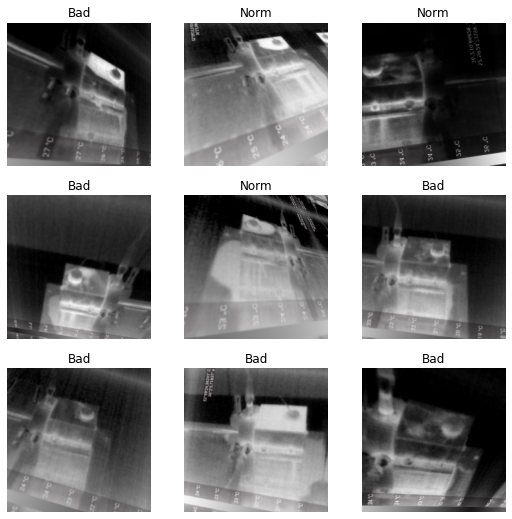

In [ ]:
dls_Training.show_batch()


Обучение

In [ ]:
learn = cnn_learner(dls_Training,resnet34,metrics=error_rate,pretrained=True,lr=0.00145)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.loss_func


FlattenedLoss of CrossEntropyLoss()

In [ ]:
learn.opt_func

<function fastai.optimizer.Adam>

SuggestedLRs(valley=0.0020892962347716093)

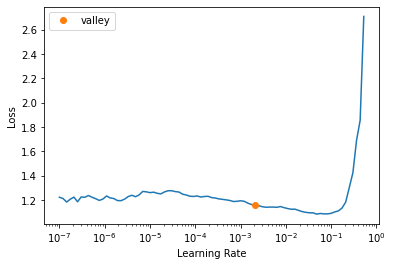

In [ ]:
learn.lr_find()


In [ ]:
learn.fine_tune(50)

epoch,train_loss,valid_loss,error_rate,time
0,1.383618,1.626902,0.666667,00:17


epoch,train_loss,valid_loss,error_rate,time
0,1.285145,1.217456,0.523810,00:09
1,1.209370,1.013016,0.500000,00:09
2,1.217955,0.942865,0.571429,00:09
3,1.201439,0.882746,0.571429,00:09
4,1.206335,0.875977,0.595238,00:09
5,1.185543,0.822709,0.547619,00:09
6,1.175365,0.815786,0.547619,00:09
7,1.177111,0.829279,0.476190,00:09
8,1.138316,0.833496,0.404762,00:09
9,1.116969,0.832032,0.404762,00:09


In [ ]:
learn.predict(pathTest/'/content/gdrive/MyDrive/DataSet/DataSet/Test/Norm/img_thermal_1637761638400.jpg')


('Norm', TensorBase(1), TensorBase([0.0013, 0.9987]))

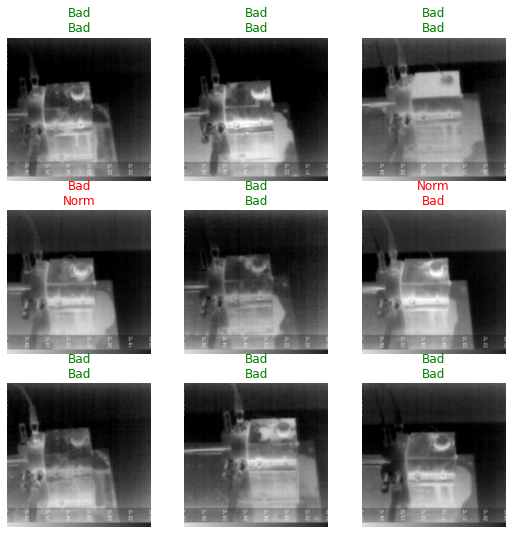

In [ ]:
learn.show_results()

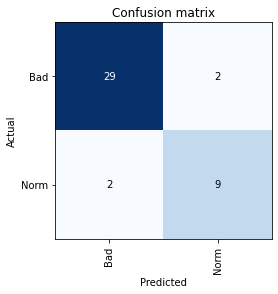

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

29 2 2 9


In [ ]:
sensitivity = tp/(tp + fn)
sensitivity

0.8181818181818182

In [ ]:
specificity = tn/(fp + tn)
specificity

0.9354838709677419

In [ ]:
ppv = tp/(tp+fp)
ppv

0.8181818181818182

In [ ]:
npv = tn/(tn+fn)
npv

0.9354838709677419

In [ ]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.9047619047619048

In [ ]:
print('Точность', acc * 100, '%')

Точность 90.47619047619048 %
